In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("recursos_humanos.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
# Codificar variables categóricas con pd.get_dummies
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

Distribución de la variable 'left':
left
0    11428
1     3571
Name: count, dtype: int64


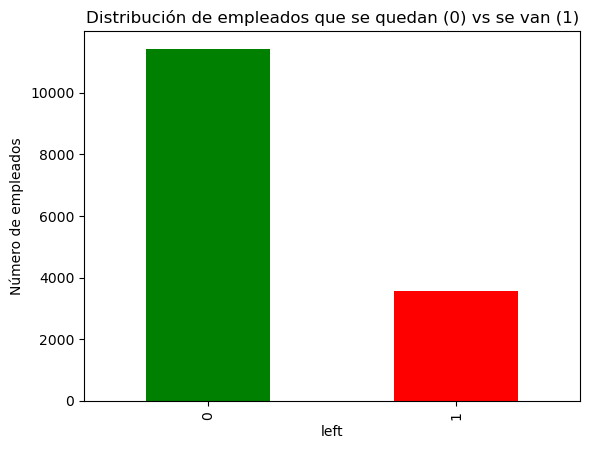

In [7]:
# Contar clases
counts = data_encoded['left'].value_counts()
print("Distribución de la variable 'left':")
print(counts)

# Visualizar
counts.plot(kind='bar', color=['green','red'])
plt.title('Distribución de empleados que se quedan (0) vs se van (1)')
plt.xlabel('left')
plt.ylabel('Número de empleados')
plt.show()


In [15]:
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Dividir en train y test 70%-30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


     k  accuracy  precision    recall  f1_score
0    1  0.955333   0.871160  0.953315  0.910388
1    2  0.950000   0.903626  0.884220  0.893818
2    3  0.944889   0.849025  0.934641  0.889778
3    4  0.946444   0.880037  0.897292  0.888581
4    5  0.941778   0.846022  0.923436  0.883036
5    6  0.945778   0.867556  0.911298  0.888889
6    7  0.942000   0.843220  0.929038  0.884052
7    8  0.944222   0.859019  0.915966  0.886579
8    9  0.940222   0.836975  0.929972  0.881026
9   10  0.942222   0.849871  0.919701  0.883408
10  11  0.938000   0.832773  0.925303  0.876603
11  12  0.940222   0.843322  0.919701  0.879857
12  13  0.936222   0.828308  0.923436  0.873289
13  14  0.939556   0.843508  0.915966  0.878245
14  15  0.937778   0.833193  0.923436  0.875996
15  16  0.940000   0.842601  0.919701  0.879464
16  17  0.936222   0.827759  0.924370  0.873401
17  18  0.938889   0.837861  0.921569  0.877723
18  19  0.934889   0.823627  0.924370  0.871095
19  20  0.937778   0.835454  0.919701  0

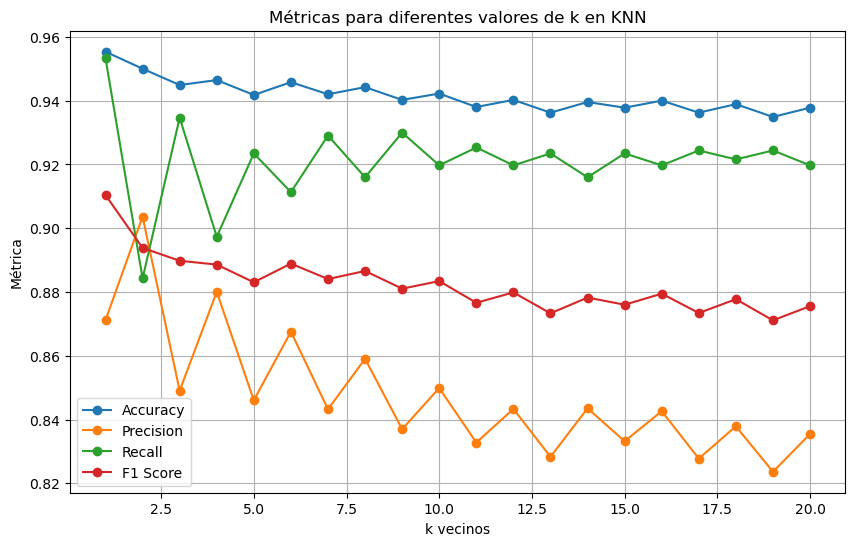

In [19]:
results = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({'k': k, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1_score': f1})

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

print(results_df)

# Graficar Accuracy vs k
plt.figure(figsize=(10,6))
plt.plot(results_df['k'], results_df['accuracy'], marker='o', label='Accuracy')
plt.plot(results_df['k'], results_df['precision'], marker='o', label='Precision')
plt.plot(results_df['k'], results_df['recall'], marker='o', label='Recall')
plt.plot(results_df['k'], results_df['f1_score'], marker='o', label='F1 Score')
plt.xlabel('k vecinos')
plt.ylabel('Métrica')
plt.title('Métricas para diferentes valores de k en KNN')
plt.legend()
plt.grid()
plt.show()


In [21]:
best_k = results_df.loc[results_df['f1_score'].idxmax(), 'k']
print(f"El valor óptimo de k es: {best_k}")


El valor óptimo de k es: 1


Matriz de confusión:
[[3278  151]
 [  50 1021]]


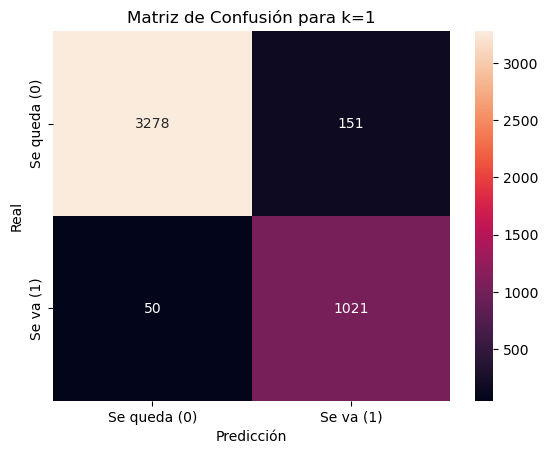

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Entrenar modelo con k óptimo
knn_opt = KNeighborsClassifier(n_neighbors=int(best_k))
knn_opt.fit(X_train, y_train)
y_pred_opt = knn_opt.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_opt)

# Mostrar matriz de confusión
print("Matriz de confusión:")
print(cm)

# Mapa de calor
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Se queda (0)', 'Se va (1)'], yticklabels=['Se queda (0)', 'Se va (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title(f'Matriz de Confusión para k={best_k}')
plt.show()


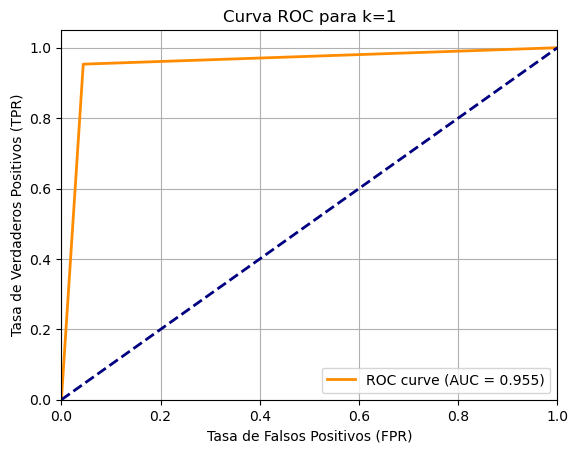

In [29]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades para clase positiva (1)
y_prob = knn_opt.predict_proba(X_test)[:,1]

# Calcular puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title(f'Curva ROC para k={best_k}')
plt.legend(loc='lower right')
plt.grid()
plt.show()
